### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 

2023-06-20 04:11:10.852759: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-20 04:11:30.003959: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-20 04:11:30.298756: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-06-20 04:11:37.651548: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-06-20 04:11:37.651588: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-20 04:11:38.702082: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-06-20

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
50000 - Number of samples in the training set

32 X 32 - pixel size (width and height) per channel of each sample

3 - Number of channels (RGB)

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

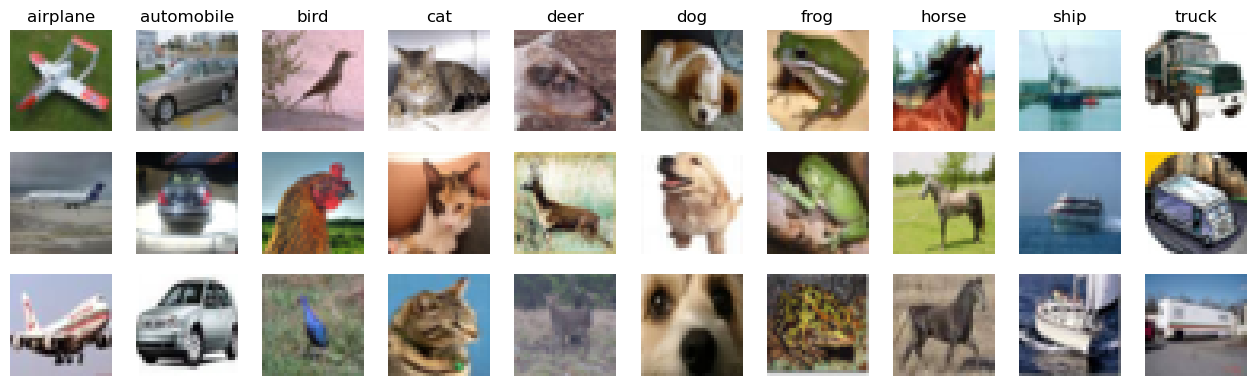

In [3]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [4]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [5]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

2023-06-20 04:13:00.208900: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 04:13:00.209441: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-20 04:13:00.210527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2023-06-20 04:13:00.210575: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-06-20 04:13:00.210619: I tensorflow/stream_executor/platform/default/dso_loa

Model: "model"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_1 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
flatten (Flatten)                            (None, 3072)                            0              
____________________________________________________________________________________________________
dense (Dense)                                (None, 128)                             393344         
____________________________________________________________________________________________________
dense_1 (Dense)                              (None, 128)                             16512          
____________________________________________________________________________

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [6]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

2023-06-20 04:13:36.838104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-20 04:13:36.840822: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2596985000 Hz


Epoch 1/15


2023-06-20 04:13:38.558244: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1250/1250 [==============================] - 11s 4ms/step - loss: 1.9619 - accuracy: 0.2769 - val_loss: 1.7387 - val_accuracy: 0.3717
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7180 - accuracy: 0.3781 - val_loss: 1.6974 - val_accuracy: 0.3925
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6504 - accuracy: 0.4074 - val_loss: 1.6648 - val_accuracy: 0.4038
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5834 - accuracy: 0.4313 - val_loss: 1.6219 - val_accuracy: 0.4194
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5497 - accuracy: 0.4407 - val_loss: 1.6003 - val_accuracy: 0.4281
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5037 - accuracy: 0.4584 - val_loss: 1.5709 - val_accuracy: 0.4401
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.4956 - accuracy: 0.4622 - val_loss: 1.5806 - val_accuracy: 0.4338
Ep

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [7]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.499
Test accuracy = 0.472


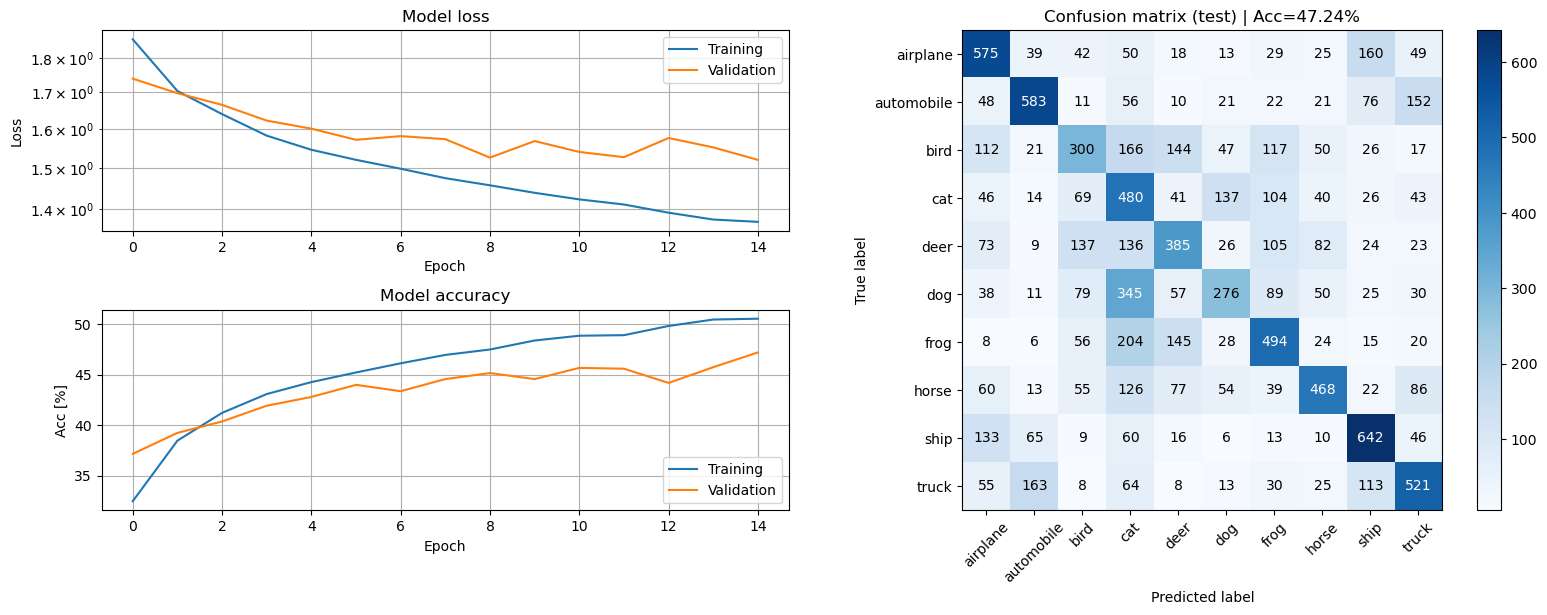

In [8]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
The model is built using three hidden layers and the activation function at each layer is ReLU. We used softmax function at the output layer because the it is a multiclass classification problem. The model has train accuracy of 50.94% and test accuracy of 47.20%.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
- CIFAR10 dataset has color images which makes challenging to classify the objects correctly where MNIST dataset has greyscale images which have only two dimensions.
- CIFAR-10 dataset contains a wider range of objects, such as animals, vehicles etc., but MNIST only has handwritten digits. With more diverse object categories, CIFAR-10 requires the model to learn and distinguish among a more variety of visual features.
- CIFAR-10 images have a higher resolution than MNIST images. The higher resolution provides more detailed visual information requiring it to capture the more complex patterns and understand finer details for accurate classification.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(32,(3,3),activation='relu')(x_in)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),activation='relu')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_8"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_9 (InputLayer)                         [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_15 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_14 (MaxPooling2D)              (None, 15, 15, 32)                      0              
____________________________________________________________________________________________________
conv2d_16 (Conv2D)                           (None, 13, 13, 64)                      18496          
__________________________________________________________________________

##### **Training the CNN**

In [32]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 10s 7ms/step - loss: 1.8132 - accuracy: 0.3337 - val_loss: 1.2604 - val_accuracy: 0.5513
Epoch 2/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1997 - accuracy: 0.5739 - val_loss: 1.1447 - val_accuracy: 0.6010
Epoch 3/15
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9846 - accuracy: 0.6514 - val_loss: 1.0107 - val_accuracy: 0.6506
Epoch 4/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8112 - accuracy: 0.7138 - val_loss: 0.9657 - val_accuracy: 0.6624
Epoch 5/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6673 - accuracy: 0.7660 - val_loss: 0.9855 - val_accuracy: 0.6685
Epoch 6/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5188 - accuracy: 0.8170 - val_loss: 1.0348 - val_accuracy: 0.6767
Epoch 7/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3981 - accuracy: 0.8603 - val_loss: 1.1378 - val_accuracy

##### **Evaluating the CNN**

In [33]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 2.294
Test accuracy = 0.655


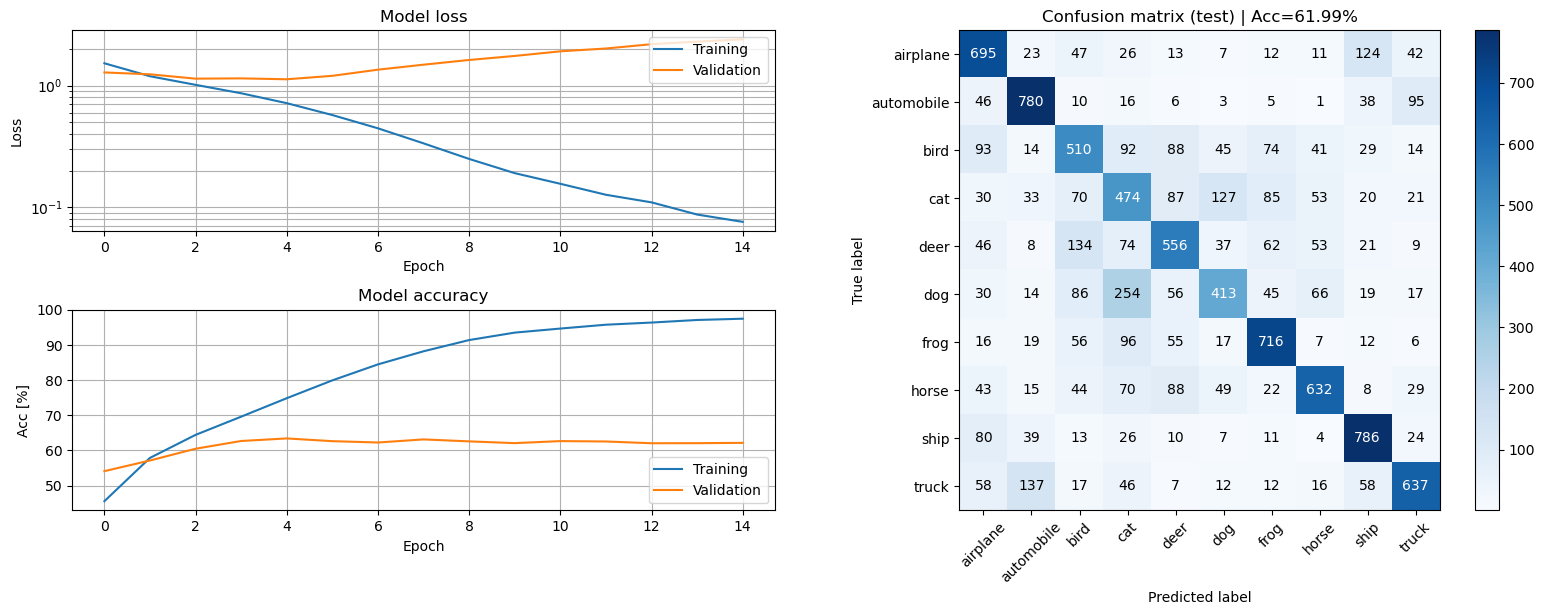

In [26]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
The model is built using two convolutional layers, each convolution layer is followed by max pooling, which allows the model to capture and extract relevant features from the input data. Model has one hidden layer and a output layer to process the extracted features and map them to the corresponding output classes. ReLU is used at each layer and softmax function is used at the ouput layer. The model could achieve train accuracy of 96.83% and test accuracy of 65.50%.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**

This model achieves higher accuracy with fewer parameters compared to the previous model due to the utilization of convolutional and pooling layers. Convolutional layers capture spatial patterns in the input data, while pooling layers reduce the spatial dimensions and retain salient features. In contrast, previous model relies only on dense layers, which lack spatial knowledge and require learning all possible feature combinations.

CNN models are more efficient in handling images because they share parameters. This means that the same weights (filters) are used across different parts of the input, reducing the overall number of parameters. By sharing parameters, CNNs can capture local patterns effectively and generalize well to variations in the image, resulting in good performance with fewer parameters.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [34]:
from tensorflow.keras.layers import Dropout

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(32,(3,3),activation='relu')(x_in)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.3)(x)
x = Conv2D(64,(3,3),activation='relu')(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.3)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_9"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_10 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_17 (Conv2D)                           (None, 30, 30, 32)                      896            
____________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D)              (None, 15, 15, 32)                      0              
____________________________________________________________________________________________________
dropout_2 (Dropout)                          (None, 15, 15, 32)                      0              
__________________________________________________________________________

In [35]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9324 - accuracy: 0.2836 - val_loss: 1.4288 - val_accuracy: 0.4924
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3479 - accuracy: 0.5177 - val_loss: 1.2578 - val_accuracy: 0.5667
Epoch 3/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1953 - accuracy: 0.5760 - val_loss: 1.1517 - val_accuracy: 0.5993
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0946 - accuracy: 0.6115 - val_loss: 1.0723 - val_accuracy: 0.6232
Epoch 5/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0021 - accuracy: 0.6423 - val_loss: 0.9925 - val_accuracy: 0.6544
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9403 - accuracy: 0.6676 - val_loss: 1.0366 - val_accuracy: 0.6385
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8911 - accuracy: 0.6853 - val_loss: 0.9941 - val_accuracy:

In [36]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.954
Test accuracy = 0.691


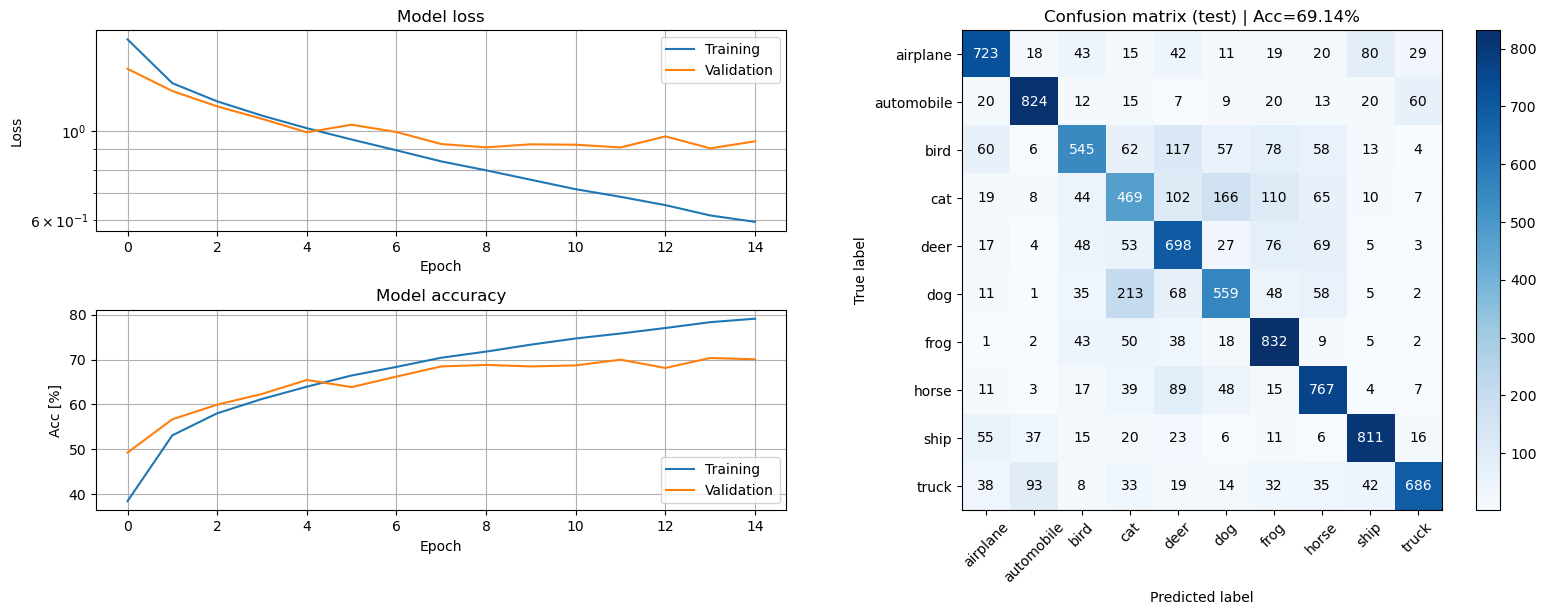

In [37]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
Dropout is a regularization technique used in neural networks to prevent overfitting. It works by randomly setting a fraction of input units to 0 at each update during training time, which helps in reducing the interdependencies between the neurons. This forces the network to learn more robust and generalized features. 

The architectures of the two models are identical except for the addition of dropout layers. Both models use convolutional and pooling layers for feature extraction and dense layers for classification.

In the previous model training accuracy steadily increases, while validation accuracy improves at a slower rate, indicating potential overfitting. In the present model with dropout layers added, training accuracy starts lower but improves over time, and validation accuracy increases faster and reaches a higher level compared to previous model.

Dropout is only used during training to enhance the robustness of the network against fluctuations in the training data. During test time or inference in production, dropout is not applied. The full network, without any dropout, is utilized to make predictions. The purpose of disabling dropout during test time is to obtain consistent and reliable predictions from the trained model. Dropout is a regularization technique that introduces randomness during training, but during inference, we want the model to make deterministic predictions without the added variability of dropout.

Reference: https://programmathically.com/dropout-regularization-in-neural-networks-how-it-works-and-when-to-use-it/?utm_content=cmp-true

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [41]:
from tensorflow.keras.layers import BatchNormalization, Activation

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(32, (3, 3))(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Conv2D(64, (3, 3))(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.3)(x)

x = Flatten()(x)
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(10, activation='softmax')(x)


# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_11"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_12 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_22 (Conv2D)                           (None, 30, 30, 64)                      1792           
____________________________________________________________________________________________________
batch_normalization_4 (BatchNormalization)   (None, 30, 30, 64)                      256            
____________________________________________________________________________________________________
activation_1 (Activation)                    (None, 30, 30, 64)                      0              
_________________________________________________________________________

In [42]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5643 - accuracy: 0.4496 - val_loss: 1.3365 - val_accuracy: 0.5290
Epoch 2/15
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0710 - accuracy: 0.6242 - val_loss: 1.1635 - val_accuracy: 0.5953
Epoch 3/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.8955 - accuracy: 0.6826 - val_loss: 1.1081 - val_accuracy: 0.6182
Epoch 4/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7615 - accuracy: 0.7334 - val_loss: 1.0291 - val_accuracy: 0.6504
Epoch 5/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6627 - accuracy: 0.7673 - val_loss: 1.2177 - val_accuracy: 0.6154
Epoch 6/15
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5584 - accuracy: 0.8072 - val_loss: 1.2740 - val_accuracy: 0.6223
Epoch 7/15
1250/1250 [==============================] - 8s 7ms/step - loss: 0.4810 - accuracy: 0.8349 - val_loss: 1.1052 - val_accuracy

In [43]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.387
Test accuracy = 0.649


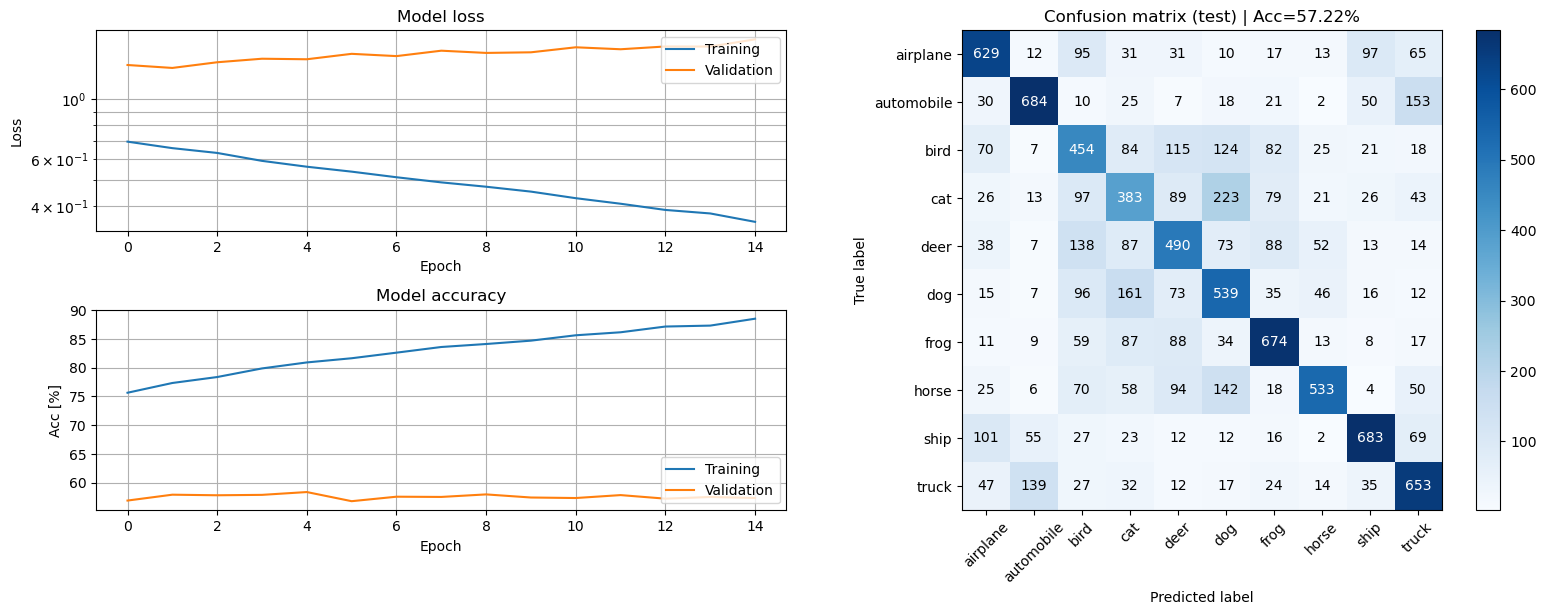

In [104]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**
The minibatch size is too small: A low momentum adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset

The minibatch size is too large: A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. Using a large batch size can have computational challenges due to increased GPU memory requirements. Additionally, it can cause the stochastic gradient descent algorithm to behave more like gradient descent, leading to slower convergence and potential issues with local minima in the loss function

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_16"
____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_20 (InputLayer)                        [(None, 32, 32, 3)]                     0              
____________________________________________________________________________________________________
conv2d_53 (Conv2D)                           (None, 30, 30, 64)                      1792           
____________________________________________________________________________________________________
batch_normalization_37 (BatchNormalization)  (None, 30, 30, 64)                      256            
____________________________________________________________________________________________________
activation_34 (Activation)                   (None, 30, 30, 64)                      0              
_________________________________________________________________________

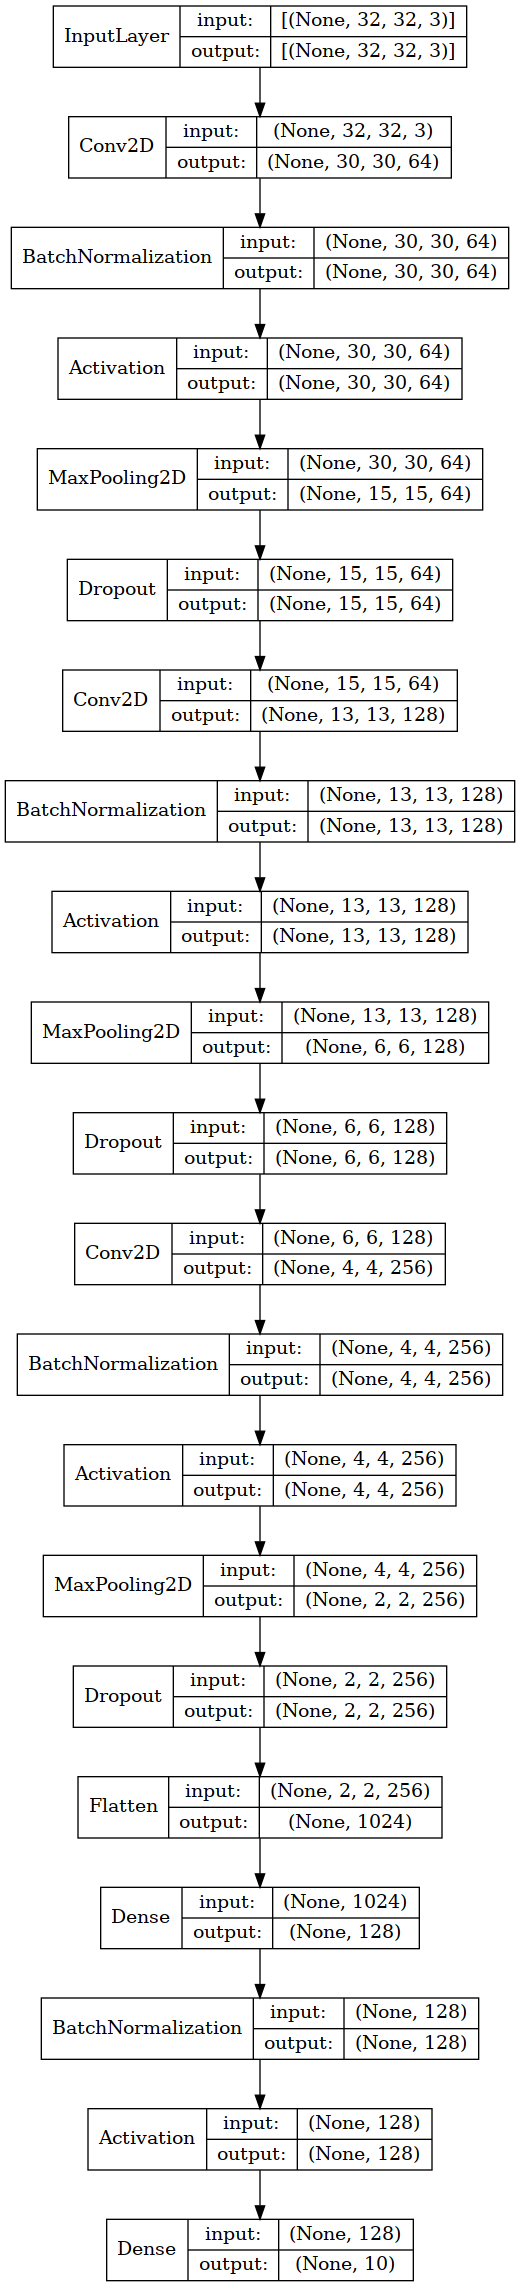

In [57]:
from tensorflow.keras.utils import plot_model

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(32, (3, 3))(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3))(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Conv2D(256, (3, 3))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(10, activation='softmax')(x)


# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [58]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 23s 18ms/step - loss: 1.6143 - accuracy: 0.4142 - val_loss: 1.5142 - val_accuracy: 0.4797
Epoch 2/25
1250/1250 [==============================] - 22s 18ms/step - loss: 1.1441 - accuracy: 0.5933 - val_loss: 1.5686 - val_accuracy: 0.5196
Epoch 3/25
1250/1250 [==============================] - 22s 18ms/step - loss: 0.9818 - accuracy: 0.6531 - val_loss: 1.0116 - val_accuracy: 0.6529
Epoch 4/25
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8940 - accuracy: 0.6805 - val_loss: 0.8620 - val_accuracy: 0.6949
Epoch 5/25
1250/1250 [==============================] - 22s 18ms/step - loss: 0.8196 - accuracy: 0.7118 - val_loss: 0.9113 - val_accuracy: 0.6837
Epoch 6/25
1250/1250 [==============================] - 22s 18ms/step - loss: 0.7664 - accuracy: 0.7298 - val_loss: 0.8513 - val_accuracy: 0.7105
Epoch 7/25
1250/1250 [==============================] - 22s 18ms/step - loss: 0.7133 - accuracy: 0.7479 - val_loss: 0.7897 -

In [59]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.668
Test accuracy = 0.791


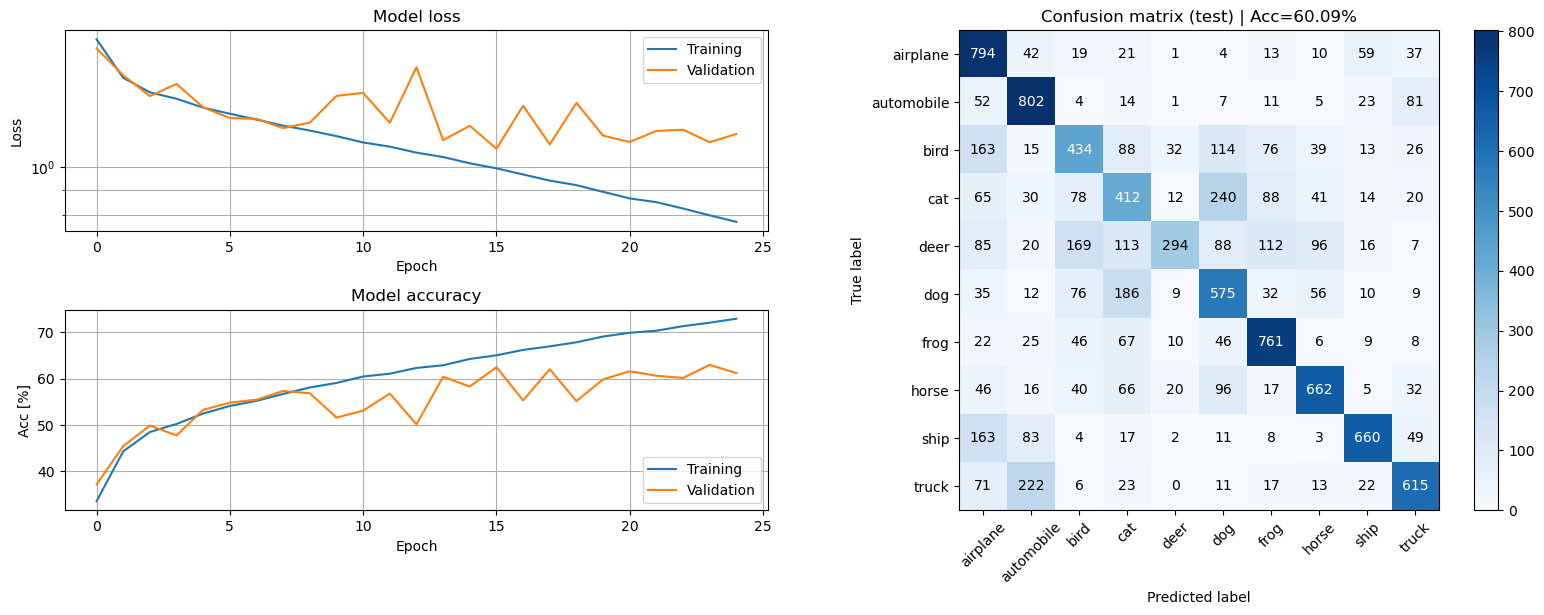

In [113]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
Our model could achieve test accuracy of 79.10%. 

Convolution Layers: Our model consists of three convolutional layers. We have used convolutional layers with increasing filter sizes to extract hierarchical features from the input images. The choice of increasing filter sizes allows the model to effectively capture spatial patterns in images as the network deepens.

Batch Normalization: Batch normalization is added after each convolutional layer and dense layer. It helps the optimization converge faster which means we get higher performance in fewer epochs.

Activation Function: ReLU activation function is used after each batch normalization layer. ReLU activation enables the model to capture complex patterns by incorporating non-linearity.

Max Pooling: Our model includes max pooling layers added after each convolutional layer. Max pooling reduces feature map dimensions and enhances the model's ability to capture important features by focusing on the most salient information.

Dropout: Dropout regularization is applied after each max pooling layer. Dropout regularization randomly sets input units to zero during training, preventing overfitting and promoting robust feature learning. It improves the model's generalization by reducing dependency on specific units.

Dense Layers: The flattened output from the last max pooling layer is connected to dense layers for classification. We added a single dense layer with 128 units followed by batch normalization and ReLU activation. The batch normalization helps stabilize the activations, and the ReLU activation introduces non-linearity to the dense layer

Output Layer: The output layer consists of a dense layer with a softmax activation function. It is responsible for predicting the probabilities of each class in the classification problem. 

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x_in = Input(shape=X_train.shape[1:])

x = ???

model = Model(inputs=x_in, outputs=x)

# You can also change this if you want
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================


In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=5, verbose=1, validation_split=0.2)

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)